In [1]:
#This function builds a directed l-isogeny graph over Fp-bar
# INPUT: primes p, l, (optional) number of steps.
# OUTPUT: The l-isogeny graph over Fp-bar.
def build_isogeny_graph_over_Fpbar(p, l, steps=oo):
    q = next(q for q in Primes() if q%4 == 3 and kronecker_symbol(-q,p) == -1)
    K = QuadraticField(-q)
    H = K.hilbert_class_polynomial()
    j0 = H.change_ring(GF(p^2)).any_root()
    
    def get_neighbors(j):
        R.<x> = GF(p^2)[]
        phi = Phi_polys(l,x,j)
        return flatten([[j2]*k for j2,k in phi.roots()])
    G = DiGraph(multiedges=True,loops=True)
    visited = set()
    not_visited = set([j0])
    count = 0
    while not_visited:
        j1 = not_visited.pop()
        visited.add(j1)
        for j2 in get_neighbors(j1):
            G.add_edge([j1,j2])
            if j2 not in visited and j2 not in not_visited:
                not_visited.add(j2)
        count += 1
        if count == steps:
            break
    Gl = G.plot(vertex_size = 90)
    return G

# This function computes the spine of a directed l-isogeny graph.
# INPUT: primes p, l, (optional) number of steps.
# OUTPUT: The spine and the Fp-bar isogeny graph.
def build_directedSpineGraph(p, l, steps = oo):
    D = build_isogeny_graph_over_Fpbar(p, l,steps)
    G = D.copy()
    for j in G.vertices():
        if j not in GF(p):
            G.delete_vertex(j)
    return G, D


The total number of vertices: 4


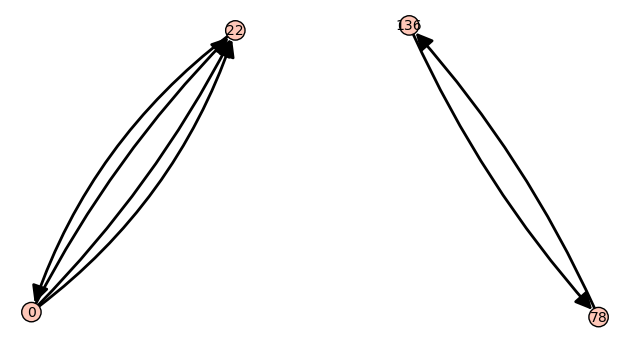

In [14]:
# Case (1) of p 1 mod 4 diameter theorem 4.1
p = 137
ell = 2
print("The total number of vertices:",BQFClassGroup(-4*p).cardinality()/2)
directedSpineGraph(p, ell)[0].plot()

The total number of vertices: 4


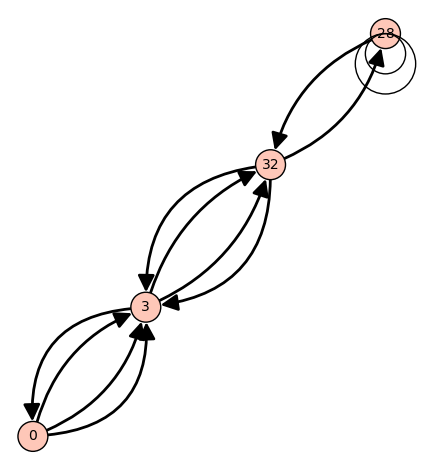

In [16]:
# Case (2) of p 1 mod 4 diameter theorem
p = 41
ell = 2
print("The total number of vertices:",BQFClassGroup(-4*p).cardinality()/2)
directedSpineGraph(p, ell)[0].plot()

The total number of vertices: 3


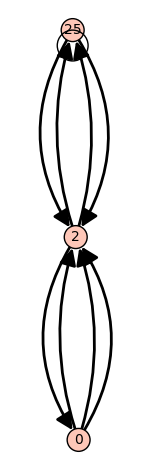

In [17]:
# Case (3) of p 1 mod 4 diameter theorem
p = 29
ell = 2
print("The total number of vertices:",BQFClassGroup(-4*p).cardinality()/2)
directedSpineGraph(p, ell)[0].plot()

The total number of vertices: 4


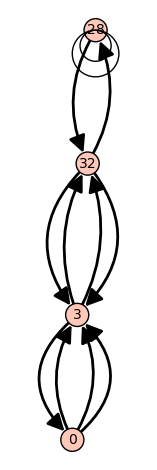

In [18]:
# Case (4) of p 1 mod 4 diameter theorem
p = 41
ell = 2
print("The total number of vertices:",BQFClassGroup(-4*p).cardinality()/2)
directedSpineGraph(p, ell)[0].plot()

The total number of vertices: 5


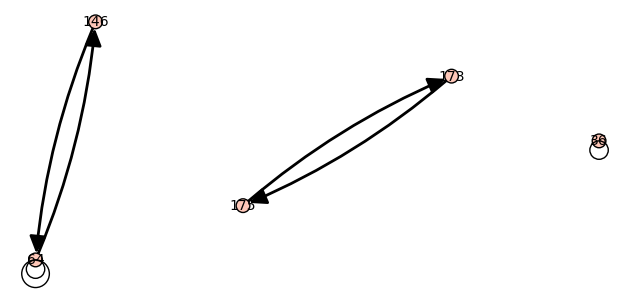

In [20]:
# Case (5) of p 1 mod 4 diameter theorem
p = 181
ell = 2
print("The total number of vertices:",BQFClassGroup(-4*p).cardinality()/2)
directedSpineGraph(p, ell)[0].plot()

The total number of vertices: 6


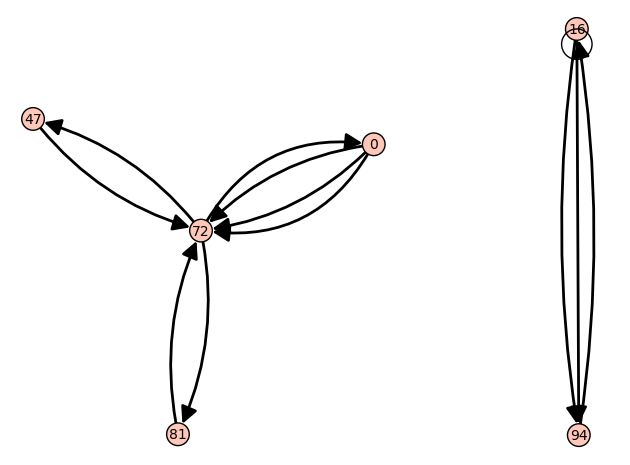

In [24]:
# Case (1) of p 3 mod 8 diameter theorem (Theorem 4.2)
p = 107
ell = 2
print("The total number of vertices:",2*BQFClassGroup(-p).cardinality())
directedSpineGraph(p, ell)[0].plot()

The total number of vertices: 6


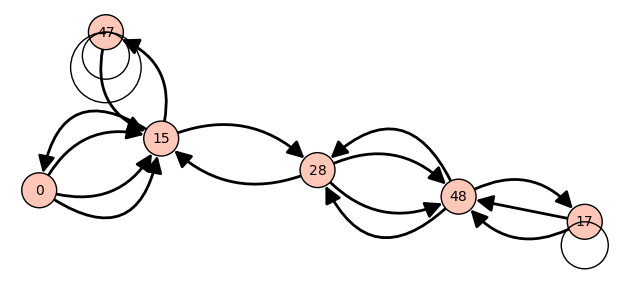

In [25]:
# Case (2) of p 3 mod 8 diameter theorem (Theorem 4.2)
p = 59
ell = 2
print("The total number of vertices:",2*BQFClassGroup(-p).cardinality())
directedSpineGraph(p, ell)[0].plot()

The total number of vertices: 10


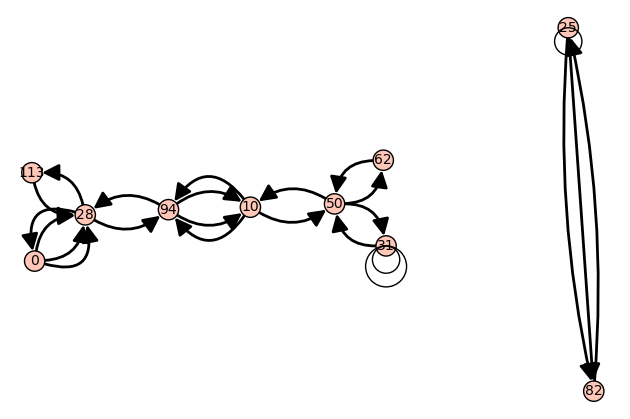

In [26]:
# Case (3) of p 3 mod 8 diameter theorem (Theorem 4.2)
p = 131
ell = 2
print("The total number of vertices:",2*BQFClassGroup(-p).cardinality())
directedSpineGraph(p, ell)[0].plot()

The total number of vertices: 7


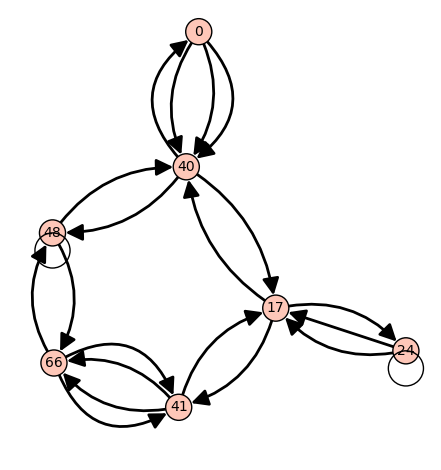

In [27]:
# An example for p 7 mod 8, with no edge attachment
p = 71
ell = 2
print("The total number of vertices:",BQFClassGroup(-p).cardinality())
directedSpineGraph(p, ell)[0].plot()

The total number of vertices: 15


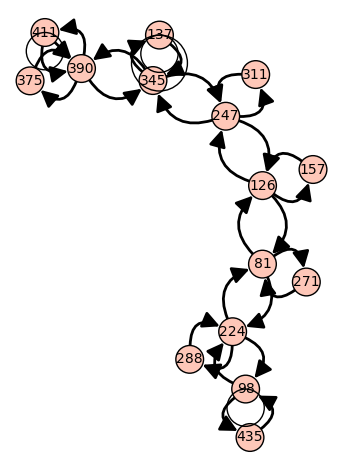

In [28]:
# An example for p 7 mod 8, with edge attachment
p = 439
ell = 2
print("The total number of vertices:",BQFClassGroup(-p).cardinality())
directedSpineGraph(p, ell)[0].plot()